In [2]:
library(dplyr)
library(Seurat)
library(patchwork)
library(ggplot2)

In [3]:
immune.combined <- readRDS('./immune_intergraion_qc.rds')

In [4]:
immune.combined

An object of class Seurat 
24450 features across 74414 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 1 other assay present: RNA

### Patient ID designation

In [5]:
immune.combined$patient <- ifelse(immune.combined$orig.ident == 'GSE134809_69', 'p5',
                                  ifelse(immune.combined$orig.ident == 'GSE134809_68', 'p5',
                                        ifelse(immune.combined$orig.ident == 'GSE134809_129', 'p7',
                                              ifelse(immune.combined$orig.ident == 'GSE134809_128', 'p7',
                                                    ifelse(immune.combined$orig.ident == 'GSE134809_135', 'p8',
                                                          ifelse(immune.combined$orig.ident == 'GSE134809_138', 'p8',
                                                                ifelse(immune.combined$orig.ident == 'GSE134809_159', 'p10',
                                                                      ifelse(immune.combined$orig.ident == 'GSE134809_158', 'p10',
                                                                            ifelse(immune.combined$orig.ident == 'GSE134809_180', 'p11',
                                                                                  ifelse(immune.combined$orig.ident == 'GSE134809_181', 'p11',
                                                                                        ifelse(immune.combined$orig.ident == 'GSE134809_186', 'p12',
                                                                                              ifelse(immune.combined$orig.ident == 'GSE134809_187', 'p12',
                                                                                                    ifelse(immune.combined$orig.ident == 'GSE134809_189', 'p13',
                                                                                                          ifelse(immune.combined$orig.ident == 'GSE134809_190', 'p13',
                                                                                                                ifelse(immune.combined$orig.ident == 'GSE134809_192', 'p14',
                                                                                                                      ifelse(immune.combined$orig.ident == 'GSE134809_193', 'p14', 'p15')
                                                                                                                      )))))))))))))))

In [6]:
head(immune.combined@meta.data, 5)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,percent.ep,percent.he,split,patient
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
inf_GSE134809_69_AAACATACACACCA-1,GSE134809_69,1233,500,1.2165450,0.0000000,0.0811030,inf,p5
inf_GSE134809_69_AAACGCACTTAGGC-1,GSE134809_69,5806,1726,0.6717189,0.1377885,0.0000000,inf,p5
inf_GSE134809_69_AAACGCTGCTACCC-1,GSE134809_69,1329,626,1.0534236,0.0000000,0.0000000,inf,p5
inf_GSE134809_69_AAACGCTGCTCATT-1,GSE134809_69,896,358,1.4508929,0.0000000,0.0000000,inf,p5
inf_GSE134809_69_AAACGCTGTCCAGA-1,GSE134809_69,957,358,1.8808777,0.0000000,0.1044932,inf,p5


# Perform an integrated analysis

In [7]:
# specify that we will perform downstream analysis on the corrected data note that the original
# unmodified data still resides in the 'RNA' assay
DefaultAssay(immune.combined) <- "integrated"

# Run the standard workflow for visualization and clustering
immune.combined <- ScaleData(immune.combined, verbose = FALSE)
immune.combined <- RunPCA(immune.combined, npcs = 30, verbose = FALSE)
immune.combined <- RunUMAP(immune.combined, reduction = "pca", dims = 1:27)
immune.combined <- FindNeighbors(immune.combined, reduction = "pca", dims = 1:27)
immune.combined <- FindClusters(immune.combined, resolution = 1.1)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
12:45:47 UMAP embedding parameters a = 0.9922 b = 1.112

12:45:47 Read 74414 rows and found 27 numeric columns

12:45:47 Using Annoy for neighbor search, n_neighbors = 30

12:45:47 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:45:58 Writing NN index file to temp file /tmp/RtmpBAruMO/file465834b87e4e

12:45:58 Searching Annoy index using 1 thread, search_k = 3000

12:46:26 Annoy recall = 100%

12:46:26 Commencing smooth kNN distance calibration using 1 thread

12:46:31 Initializing fr

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 74414
Number of edges: 2703359

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8850
Number of communities: 27
Elapsed time: 30 seconds


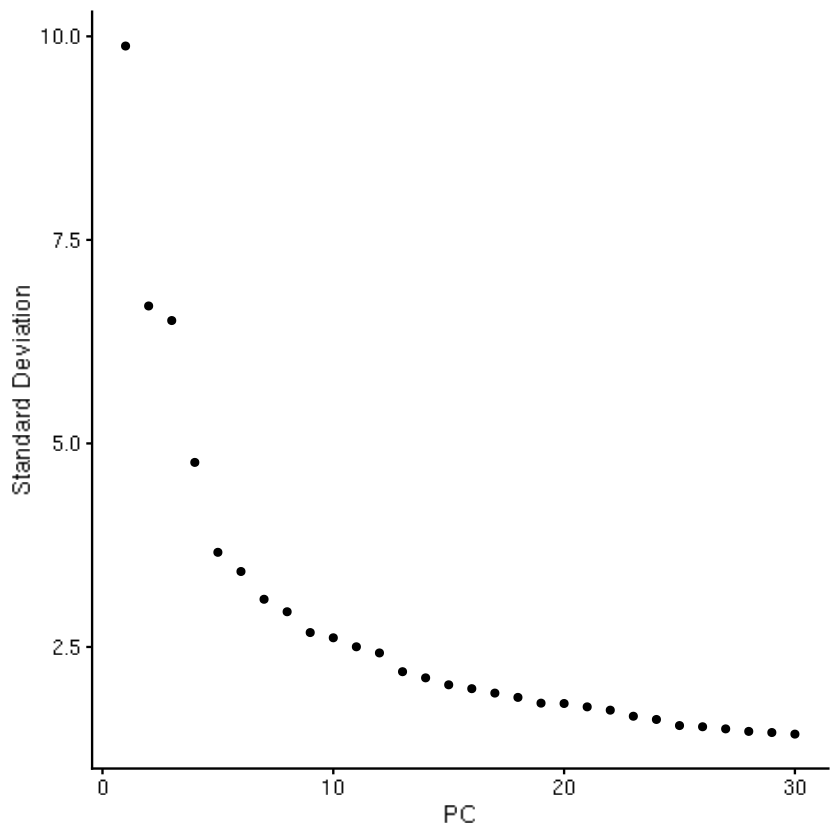

In [8]:
ElbowPlot(immune.combined, ndims = 30)

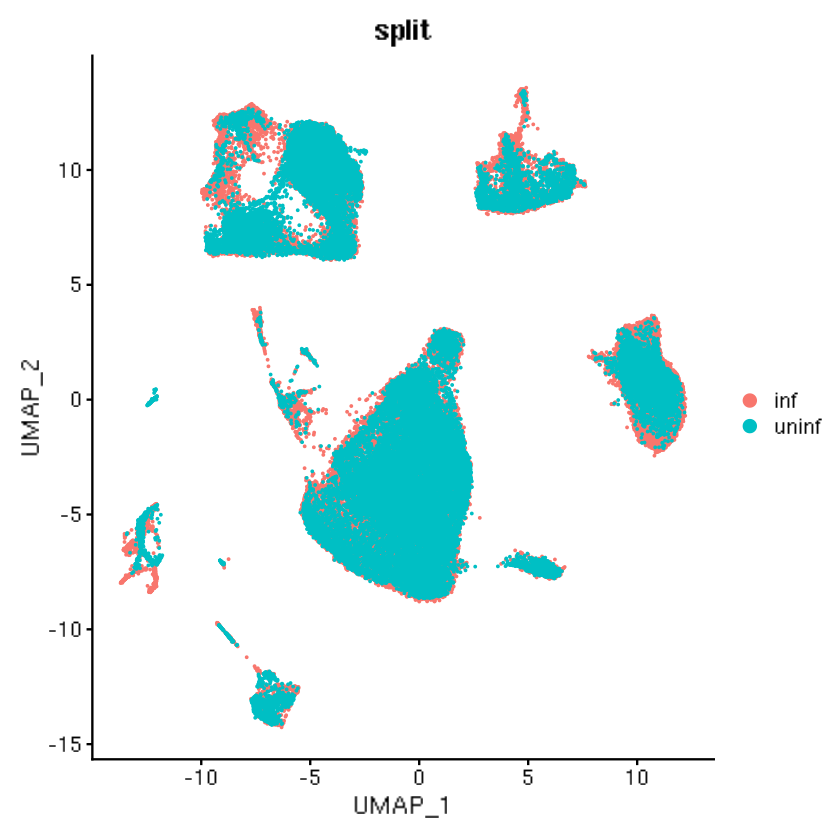

In [9]:
# Visualization
p1 <- DimPlot(immune.combined, reduction = "umap", group.by = "split")
p2 <- DimPlot(immune.combined, reduction = "umap", label = TRUE, repel = TRUE)
p1

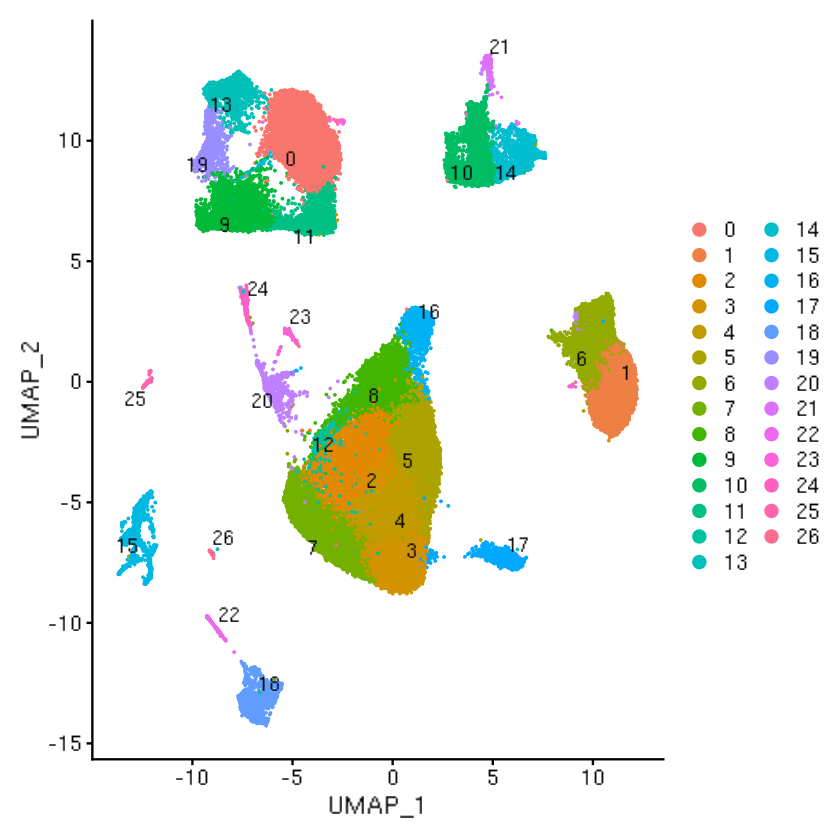

In [10]:
p2

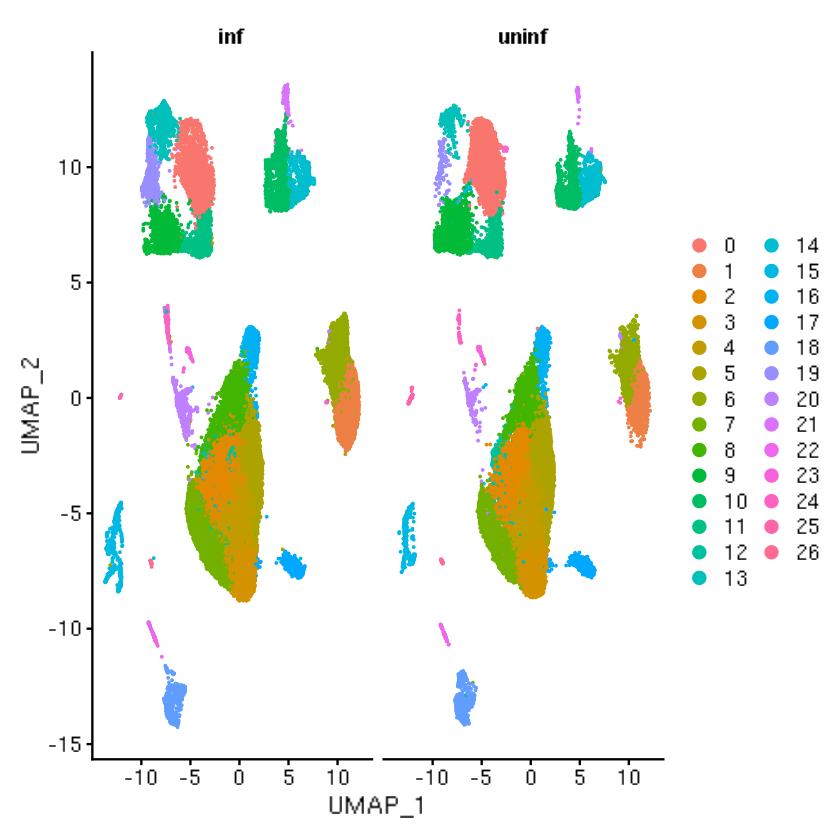

In [11]:
DimPlot(immune.combined, reduction = "umap", split.by = "split")

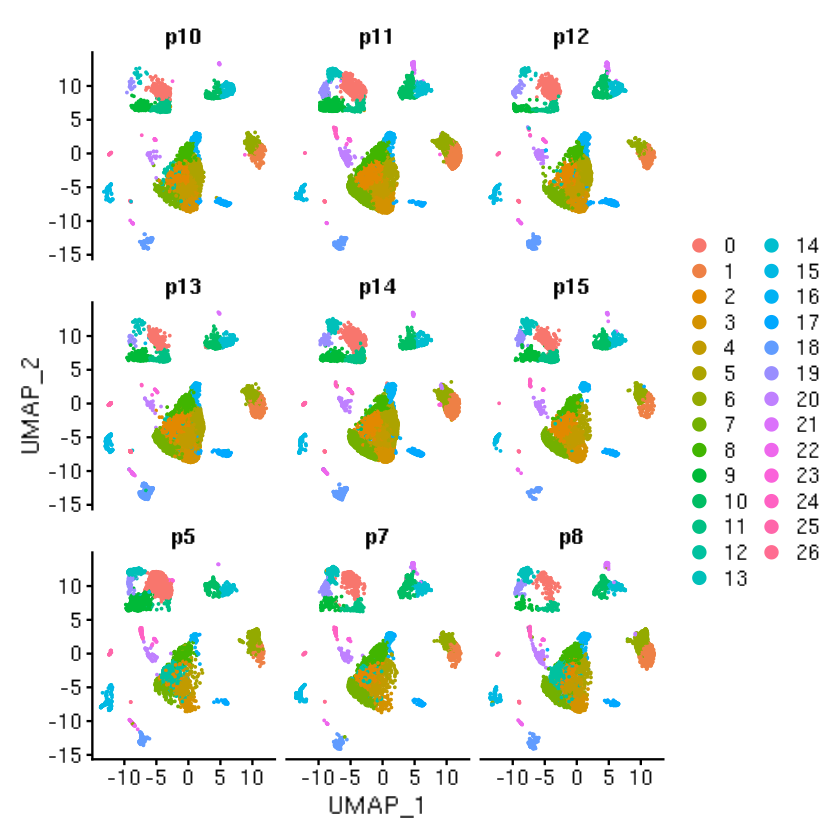

In [12]:
DimPlot(immune.combined, reduction = "umap", split.by = "patient", ncol = 3)

# Naming clusters with cell type markers

In [13]:
tcell <- c('CD7', 'CD2', 'CD3D', 'STMN1', 'KIAA0101', 'PCNA', 'TNFRSF4', 'TNFRSF18', 'CTLA4', 'IL2RA', 'FOXP3', 'CCR7',
          'SELL', 'LEF1', 'CST7', 'GZMA', 'GZMK', 'CD8A', 'CD8B', 'CD69', 'ID2', 'ANKRD28', 'GPR171', 'TNFAIP3', 
           'ANXA1', 'IL7R')
ILC <- c('TRDC', 'TYROBP', 'FCER1G', 'CMC1', 'XCL2', 'IL2RB', 'KLRD1', 'KLRF1', 'CLIC3', 'MCTP2')
plasma <- c('MZB1', 'TNFRSF17', 'SEC11C', 'DERL3', 'XBP1', 'IGHA2', 'IGHM', 'IGHG1', 'IGHG3')
bcell <- c('BANK1', 'VPREB3', 'CD24', 'ARHGAP24', 'FCRLA', 'RALGPS2', 'TNFRSF13C', 'SPIB', 'MS4A1', 'CD79B', 'CD19', 'IGHD',
          'FCER2', 'TCL1A', 'CD72', 'CD27', 'CLECL1', 'TNFRSF13B')
MNP <- c('FCGR3A', 'CD14', 'CD68', 'SLC40A1', 'STAB1', 'SEPP1', 'CSF1R', 'MS4A4A', 'SLCO2B1', 'MAFB', 'MS4A7', 'C1QA',
          'C1QB', 'C1QC', 'IL1RN', 'S100A8', 'S100A9', 'TREM1', 'KYNU', 'C1orf54', 'CLEC9A', 'CADM1', 'CPNE3', 'XCR1', 
         'IDO1', 'CLEC10A', 'FCER1A', 'CD1C', 'CD1D', 'GPR157', 'LAMP3', 'DAPP1', 'FSCN1', 'CCL19', 'CCL22', 'EBI3')
pDC <- c('GZMB', 'TCF4', 'LILRA4', 'IRF7', 'CLEC4C')
mast <- c('IL1RL1', 'CPA3', 'MS4A2', 'TPSB2', 'TPSAB1', 'ADCYAP1', 'GATA2', 'HPGDS', 'HPGD')
stroma_gli <- c('VWF', 'RAMP3', 'NPDC1', 'JAM2', 'PLVAP', 'NOTCH4', 'HSPG2', 'ESAM', 'CYYR1', 'CD93', 'ICAM2', 'S1PR1',
          'RAMP2', 'CD36', 'CA4', 'TMEM88', 'FLT1', 'ACKR1', 'SELP', 'DUSP23', 'PROX1', 'MMRN1', 'CCL21', 'IGF2', 
         'LYVE1', 'TFF3', 'RGS5', 'NDUFA4L2', 'C11orf96', 'ACTG2', 'MYH11', 'CXCL14', 'ADH1B', 'CTSK', 'MMP2', 'LUM',
               'PTGDS', 'TCF21', 'ADAMDEC1', 'CCL13', 'CCL8', 'ADAM28', 'HAPLN1', 'ABCA8', 'CFD', 'THY1', 'CHI3L1', 'BGN',
               'PDPN', 'TNFRSF12A', 'MPZ', 'NRXN1', 'SCN7A', 'SEMA3B', 'SOX2', 'MYOT', 'GFRA3', 'TUBB2B', 'GPM6B', 'PLP1',
               'XKR4', 'ALDH1A1', 'CRYAB', 'NTM', 'ANK3', 'LGI4', 'S100B')

In [ ]:
for (i in tcell) {
    print(FeaturePlot(immune.combined, features = i, min.cutoff = "q9"))
}

In [ ]:
for (i in ILC) {
    print(FeaturePlot(immune.combined, features = i, min.cutoff = "q9"))
}

In [ ]:
for (i in plasma) {
    print(FeaturePlot(immune.combined, features = i, min.cutoff = "q9"))
}

In [ ]:
for (i in bcell) {
    print(FeaturePlot(immune.combined, features = i, min.cutoff = "q9"))
}

In [ ]:
for (i in MNP) {
    print(FeaturePlot(immune.combined, features = i, min.cutoff = "q9"))
}

In [ ]:
for (i in pDC) {
    print(FeaturePlot(immune.combined, features = i, min.cutoff = "q9"))
}

In [ ]:
for (i in mast) {
    print(FeaturePlot(immune.combined, features = i, min.cutoff = "q9"))
}

In [ ]:
for (i in stroma_gli) {
    print(FeaturePlot(immune.combined, features = i, min.cutoff = "q9"))
}

## Representative markers of each cluster

Warning message:
“Could not find CD3D in the default search locations, found in RNA assay instead”
Warning message:
“Could not find GPR171 in the default search locations, found in RNA assay instead”
Warning message:
“Could not find IL7R in the default search locations, found in RNA assay instead”


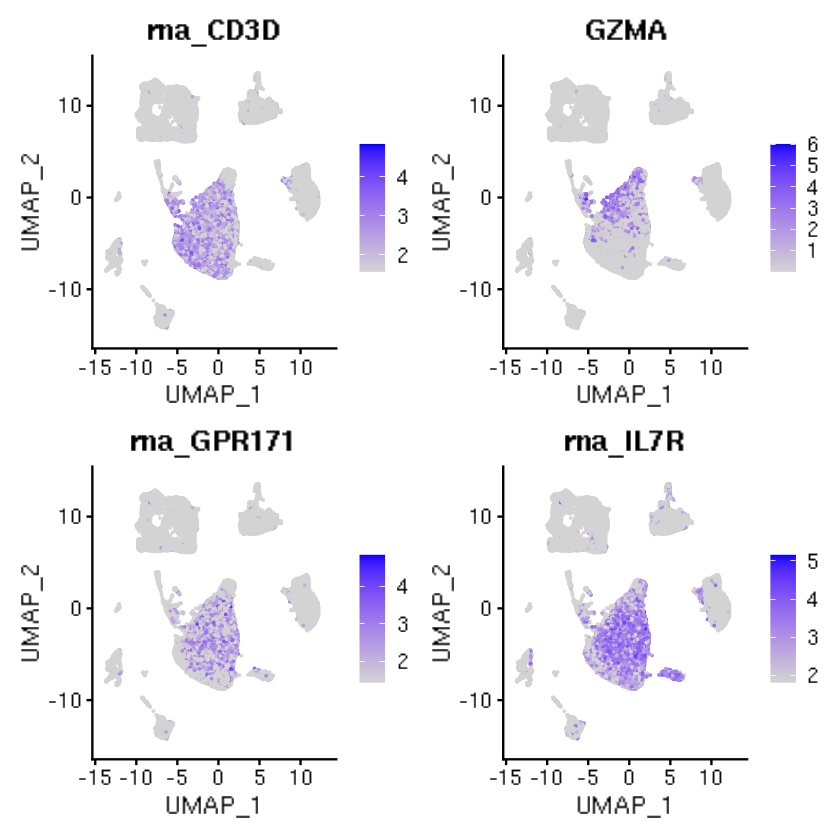

In [14]:
#T cell
FeaturePlot(immune.combined, features = c("CD3D", "GZMA", "GPR171", "IL7R"), min.cutoff = "q9")

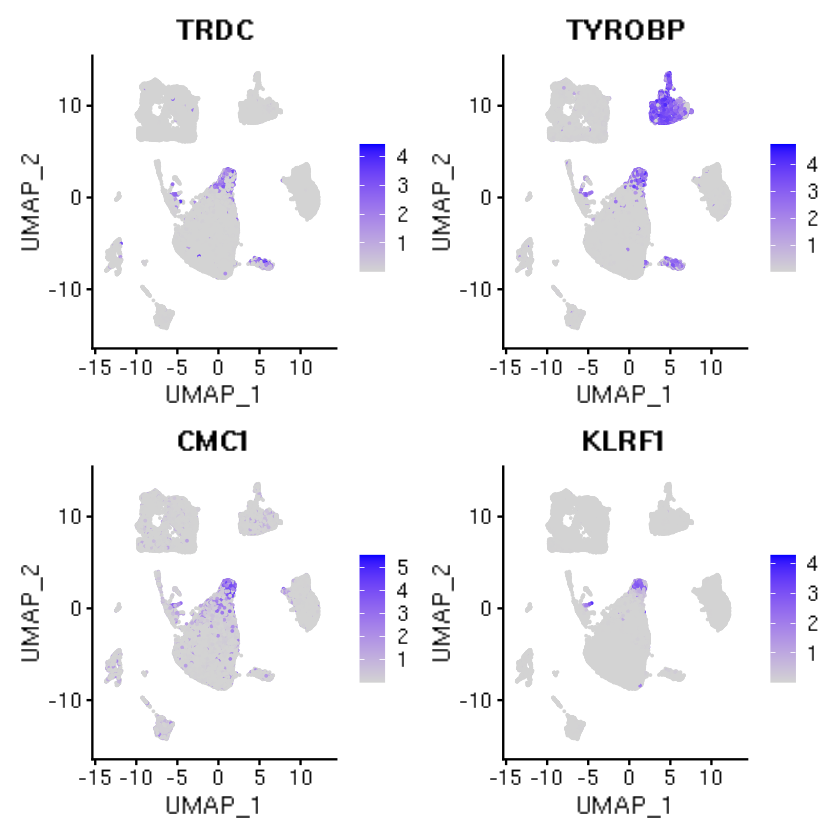

In [15]:
#ILC
FeaturePlot(immune.combined, features = c("TRDC", "TYROBP", "CMC1", "KLRF1"), min.cutoff = "q9")

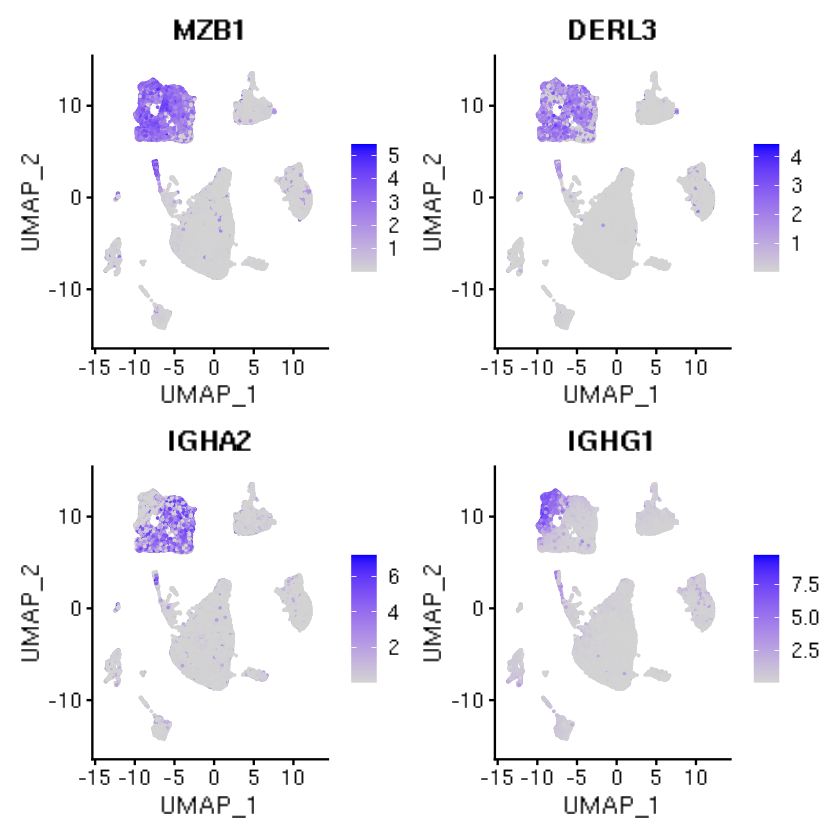

In [16]:
#plasma
FeaturePlot(immune.combined, features = c("MZB1", "DERL3", "IGHA2", "IGHG1"), min.cutoff = "q9")

Warning message:
“Could not find BANK1 in the default search locations, found in RNA assay instead”
Warning message:
“Could not find ARHGAP24 in the default search locations, found in RNA assay instead”
Warning message:
“Could not find TNFRSF13C in the default search locations, found in RNA assay instead”


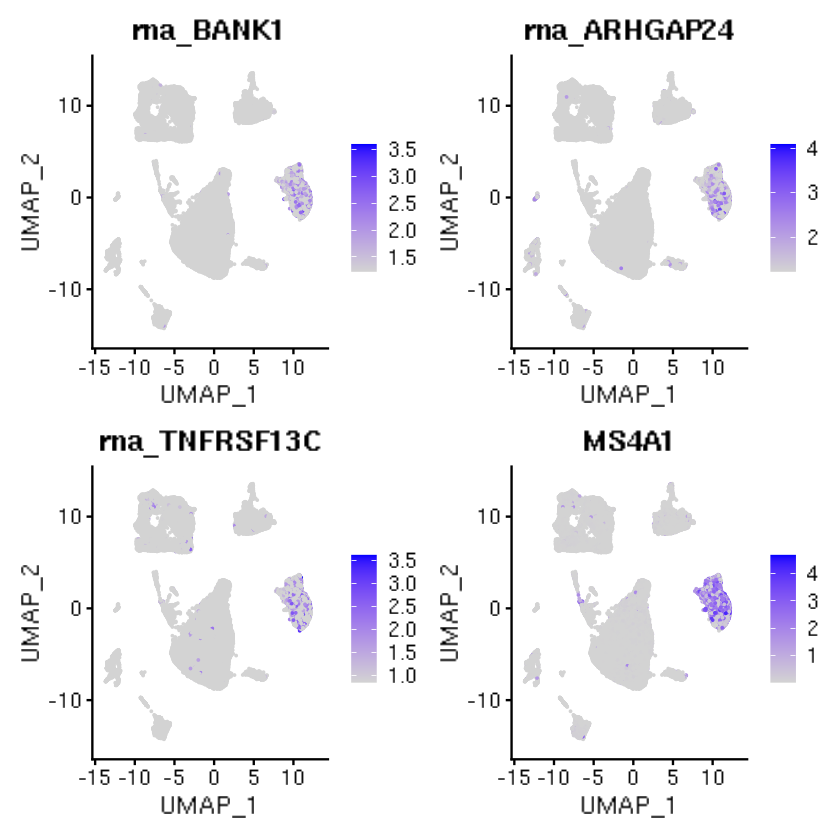

In [17]:
#B cell
FeaturePlot(immune.combined, features = c("BANK1", "ARHGAP24", "TNFRSF13C", "MS4A1"), min.cutoff = "q9")

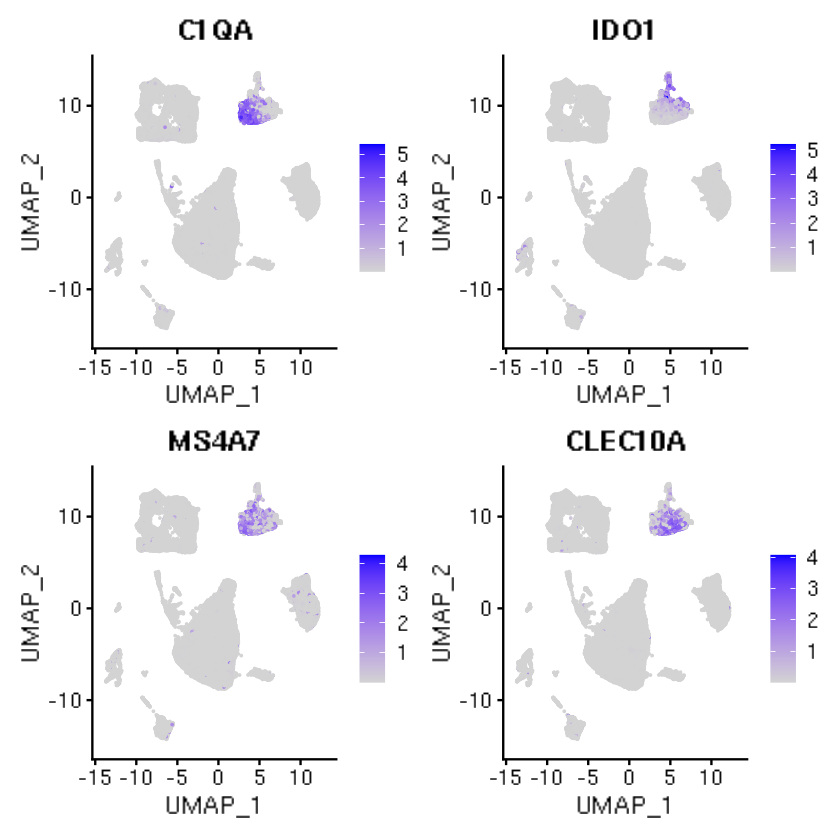

In [18]:
#MNP
FeaturePlot(immune.combined, features = c("C1QA", "IDO1",'MS4A7', "CLEC10A"), min.cutoff = "q9")

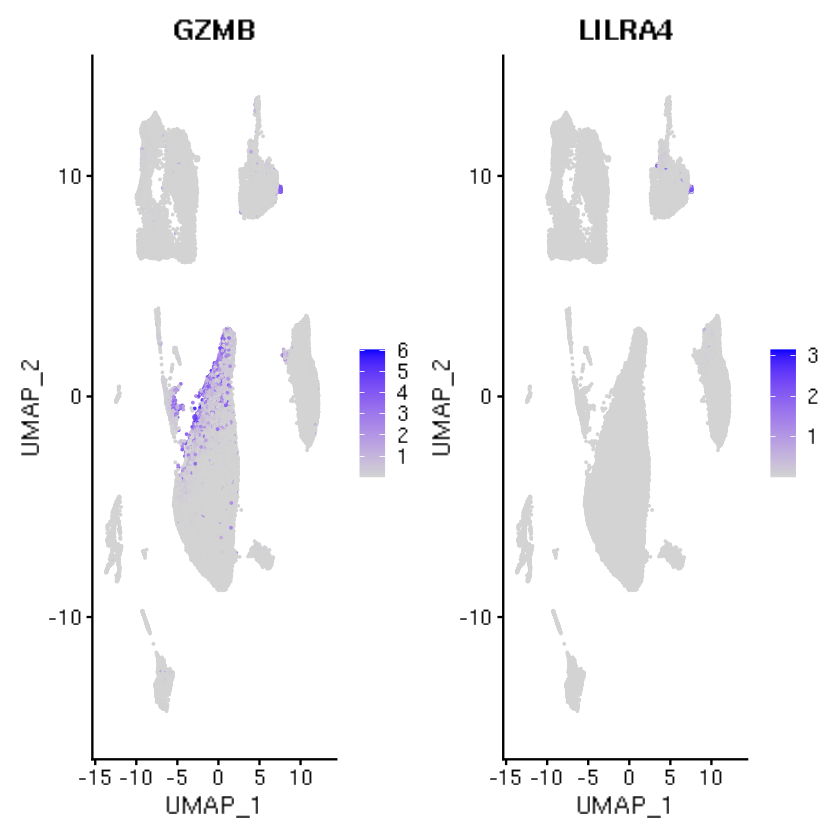

In [19]:
#pDC
FeaturePlot(immune.combined, features = c("GZMB", "LILRA4"), min.cutoff = "q9")

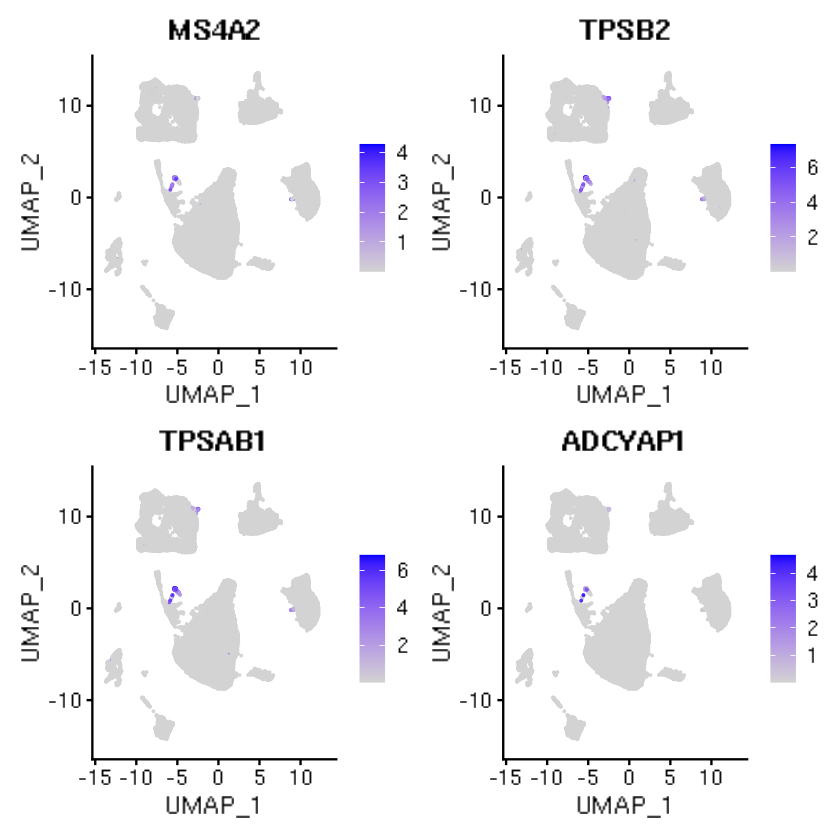

In [20]:
#mast cell
FeaturePlot(immune.combined, features = c("MS4A2", "TPSB2", "TPSAB1", "ADCYAP1"), min.cutoff = "q9")

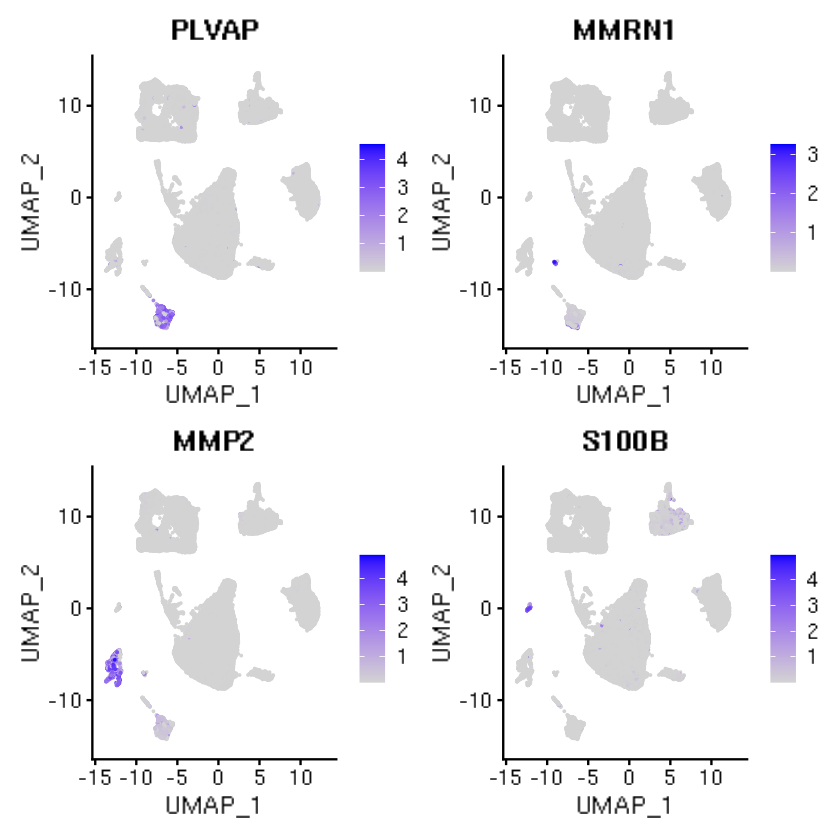

In [21]:
#stromal.gli
FeaturePlot(immune.combined, features = c("PLVAP", 'MMRN1', "MMP2", "S100B"), min.cutoff = "q9")

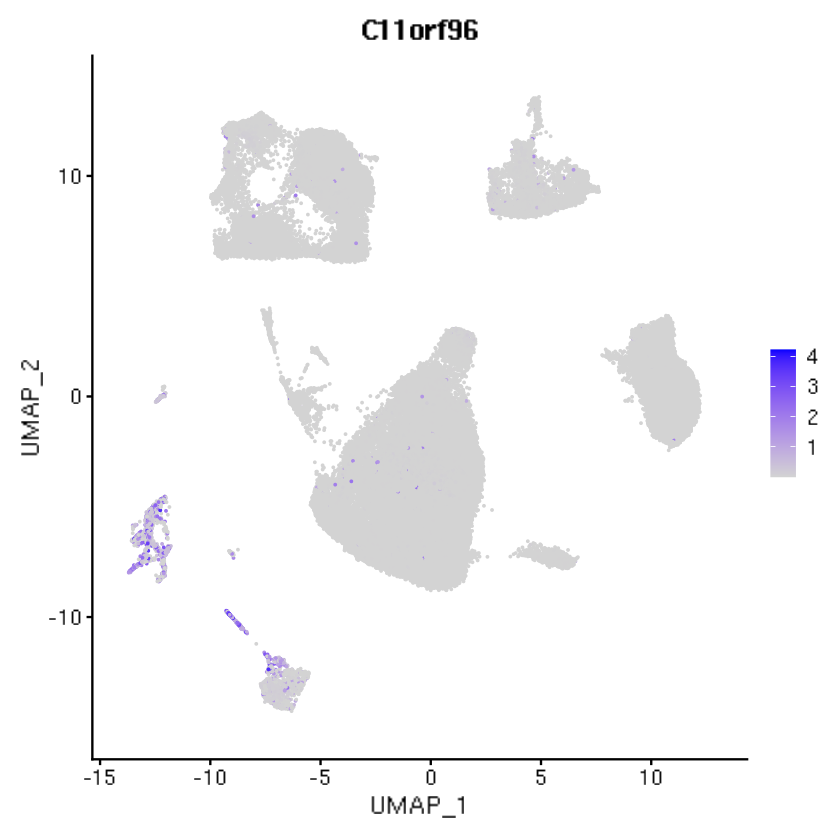

In [22]:
#stromal.gli
FeaturePlot(immune.combined, features = "C11orf96", min.cutoff = "q9")

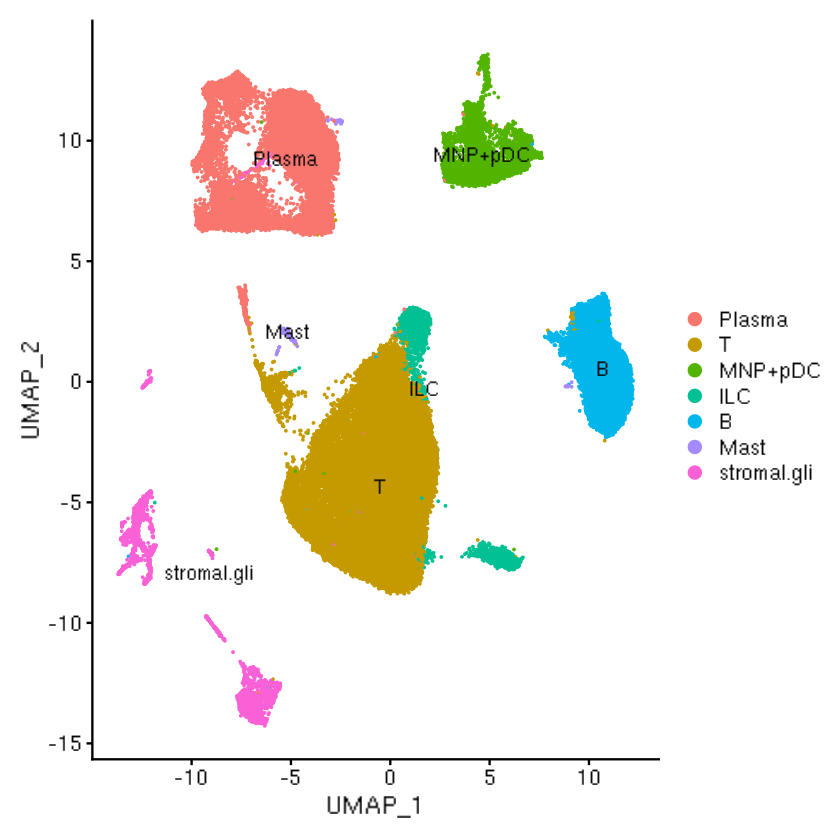

In [26]:
immune.combined <- RenameIdents(immune.combined, 
                                `0` = "Plasma", `13` = "Plasma", `19` = "Plasma", `11` = "Plasma", `9` = "Plasma", `24` = "Plasma",
                                `20` = "T", `8` = "T", `12` = "T", `2` = "T", `5` = "T", `4` = "T", `3` = "T", `7` = "T",
                                `10` = "MNP+pDC", `14` = "MNP+pDC", `21` = "MNP+pDC",
                                `16` = "ILC", `17` = "ILC",
                                `6` = "B", `1` = "B",
                                `23` = "Mast", 
                                `25` = "stromal.gli", `15` = "stromal.gli", `26` = "stromal.gli", `22` = "stromal.gli", `18` = "stromal.gli")
DimPlot(immune.combined, label = TRUE)

# Dotplot of marker genes

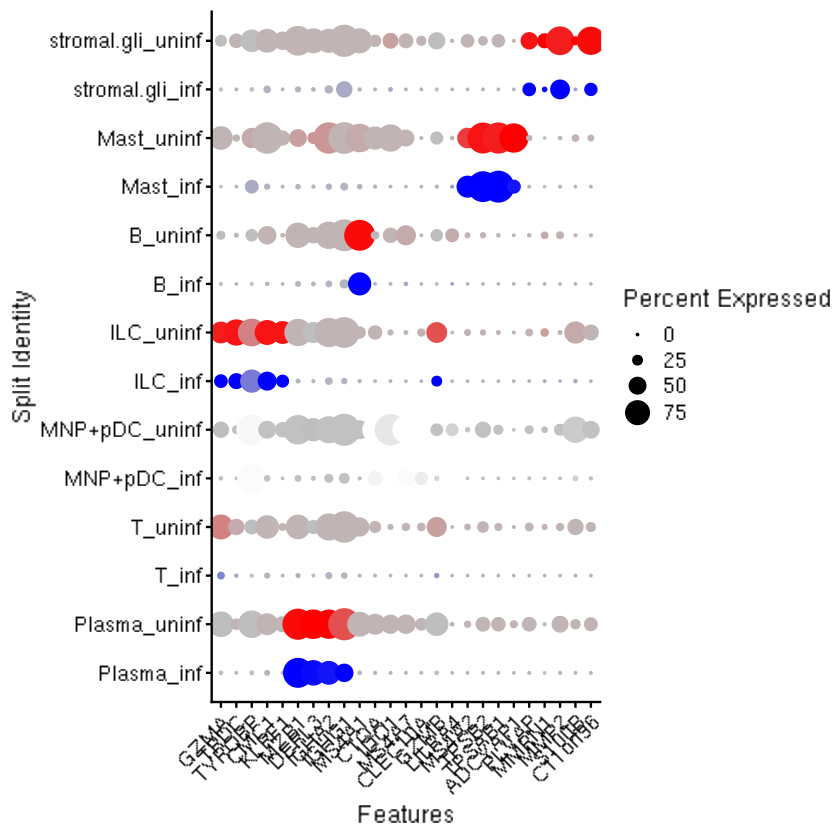

In [33]:
Idents(immune.combined) <- immune.combined$celltype
markers.to.plot <- c("GZMA", "TRDC", "TYROBP", "CMC1", "KLRF1", "MZB1", "DERL3", "IGHA2", "IGHG1", 
                    "MS4A1", "C1QA", "IDO1", "MS4A7",'CLEC10A', "GZMB", "LILRA4", "MS4A2", 
                     "TPSB2", "TPSAB1", "ADCYAP1", 'PLVAP', "MMRN1", "MMP2", "S100B", "C11orf96")
DotPlot(immune.combined, features = markers.to.plot, cols = c("blue", "red"), dot.scale = 8, split.by = "split") + 
    RotatedAxis()

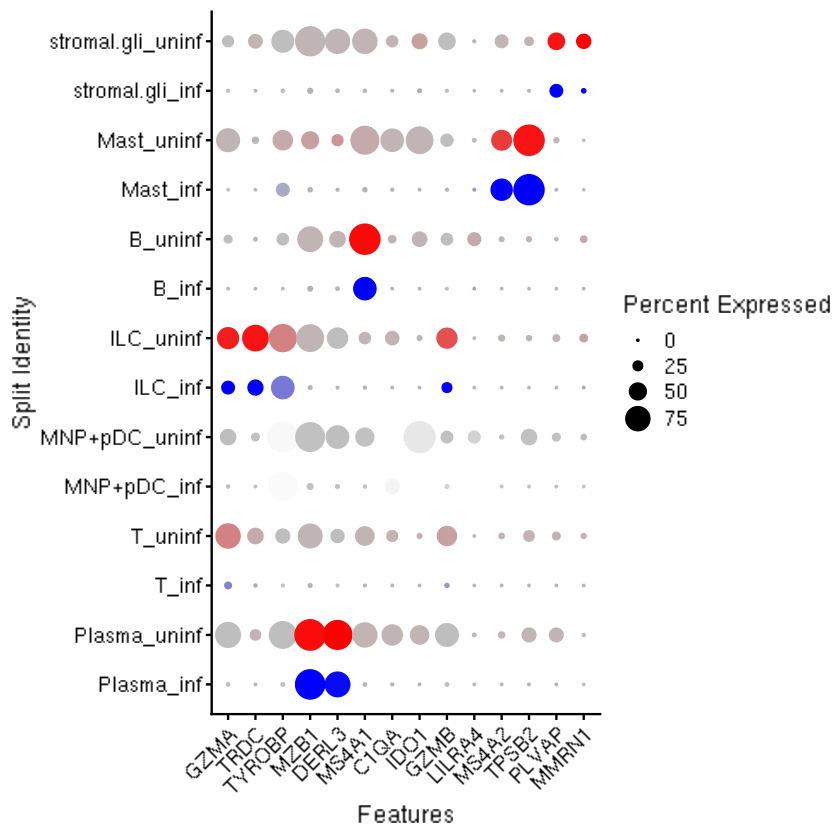

In [34]:
#Idents(immune.combined) <- immune.combined$celltype
markers.to.plot <- c("GZMA", "TRDC", "TYROBP", "MZB1", "DERL3", 
                    "MS4A1", "C1QA", "IDO1", "GZMB", "LILRA4", "MS4A2", 
                     "TPSB2", 'PLVAP', "MMRN1")
DotPlot(immune.combined, features = markers.to.plot, cols = c("blue", "red"), dot.scale = 8, split.by = "split") + 
    RotatedAxis()

# Comparison of distributions of clusters

In [27]:
immune.combined$celltype <- Idents(immune.combined)

### inf vs uninf

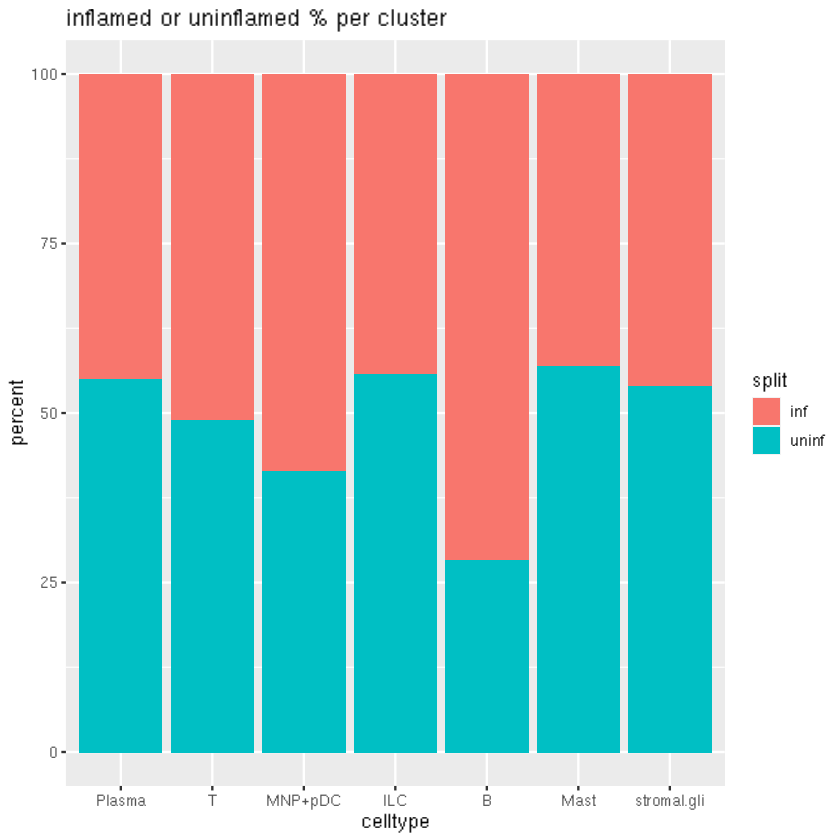

In [28]:
immune.combined@meta.data %>%
  group_by(celltype,split) %>%
  count() %>%
  group_by(celltype) %>%
  mutate(percent=100*n/sum(n)) %>%
  ungroup() %>%
  ggplot(aes(x=celltype,y=percent, fill=split)) +
  geom_col() +
  ggtitle("inflamed or uninflamed % per cluster")

### by patient

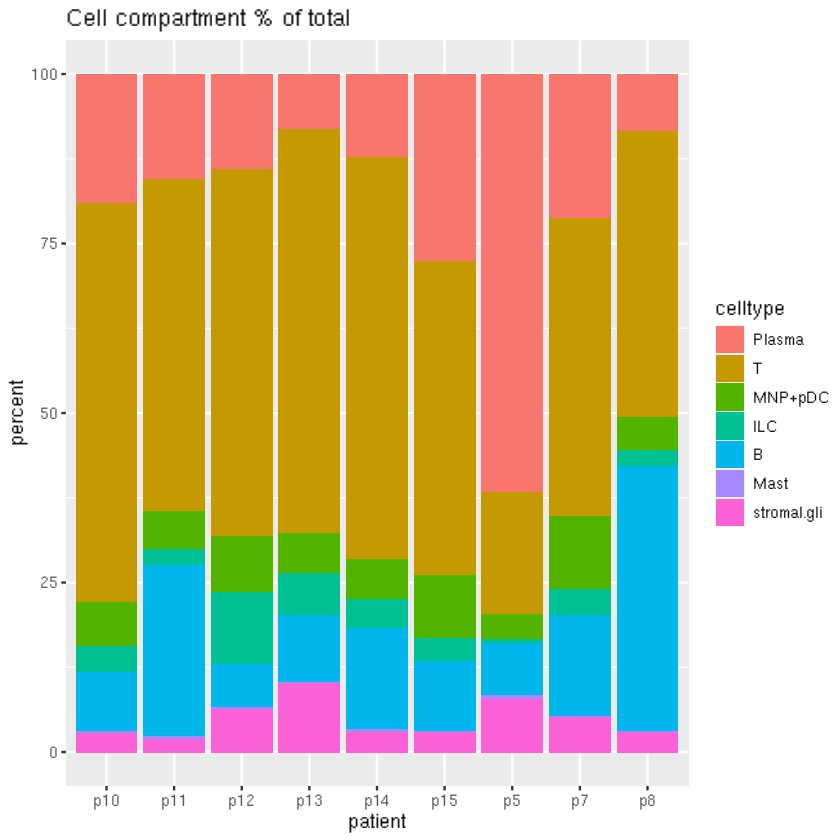

In [29]:
immune.combined@meta.data %>%
  group_by(patient, split, celltype) %>%
  count() %>%
  group_by(patient) %>%
  mutate(percent=100*n/sum(n)) %>%
  ungroup() %>%
  ggplot(aes(x=patient,y=percent, fill=celltype)) + 
  geom_col() + 
  ggtitle("Cell compartment % of total")

### comparison between inf and uninf tissues by patient

In [30]:
a <- immune.combined@meta.data %>%
  filter(split == 'inf') %>%
  group_by(patient, split, celltype) %>%
  count() %>%
  group_by(patient) %>%
  mutate(percent=100*n/sum(n)) %>%
  ungroup()
b <- immune.combined@meta.data %>%
  filter(split == 'uninf') %>%
  group_by(patient, split, celltype) %>%
  count() %>%
  group_by(patient) %>%
  mutate(percent=100*n/sum(n)) %>%
  ungroup()

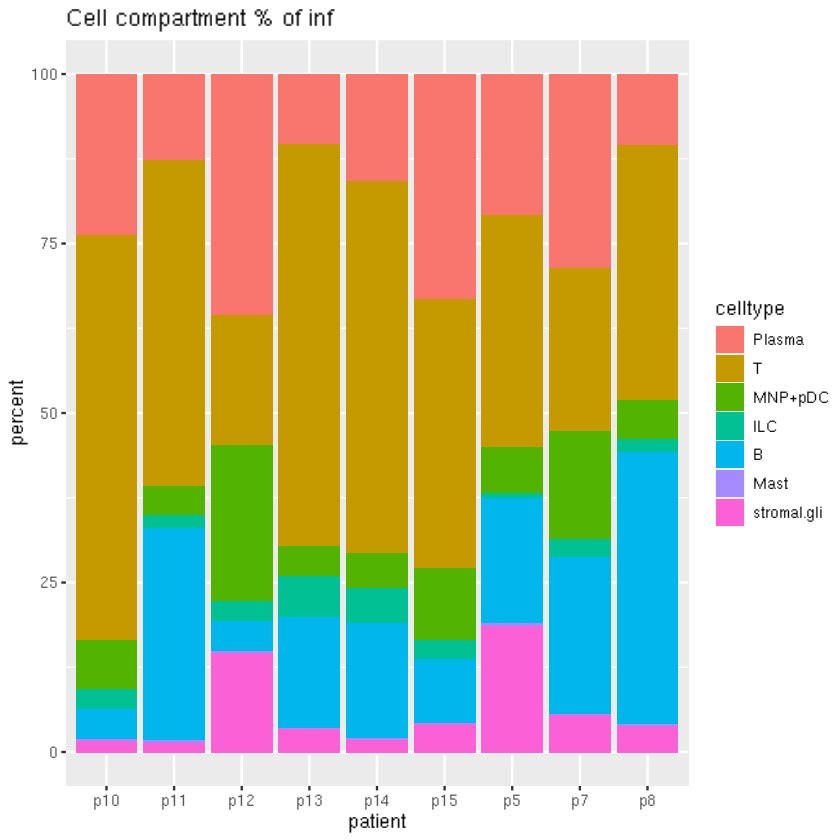

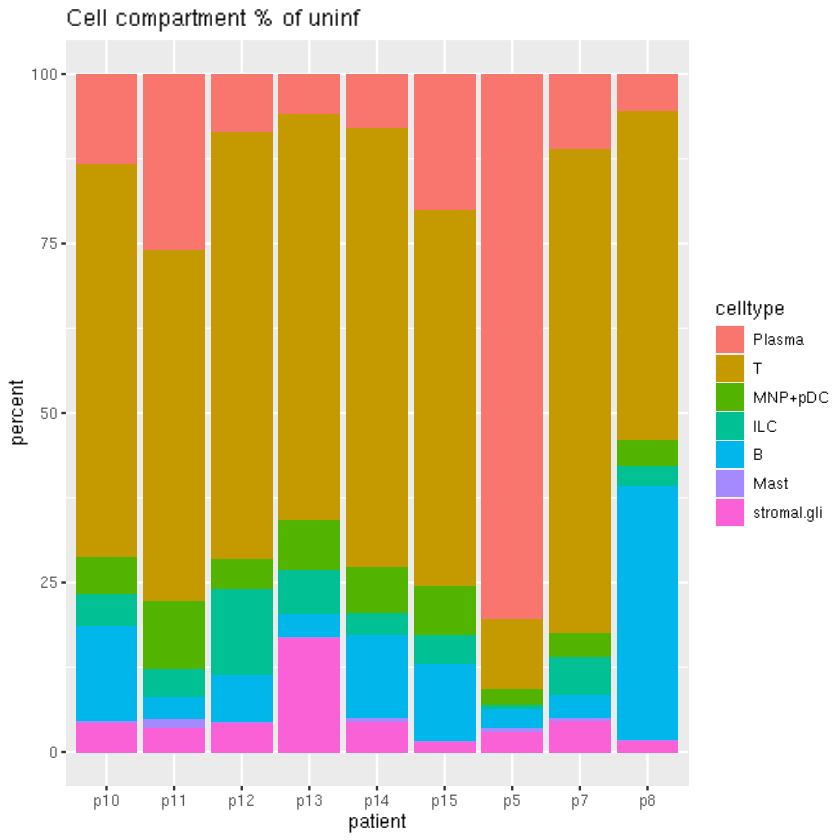

In [32]:
ggplot(a, aes(x=patient,y=percent, fill=celltype)) + geom_col() + ggtitle("Cell compartment % of inf")
ggplot(b, aes(x=patient,y=percent, fill=celltype)) + geom_col() + ggtitle("Cell compartment % of uninf")

In [38]:
t <- subset(immune.combined, idents = "T")
plasma <- subset(immune.combined, idents = "Plasma")
b <- subset(immune.combined, idents = "B")
MNP <- subset(immune.combined, idents = "MNP+pDC")
stromal.gli <- subset(immune.combined, idents = "stromal.gli")
ILC <- subset(immune.combined, idents = "ILC")
mast <- subset(immune.combined, idents = "Mast")

In [39]:
saveRDS(t, file = "./t_cluster.rds")
saveRDS(plasma, file = "./plasma_cluster.rds")
saveRDS(b, file = "./b_cluster.rds")
saveRDS(MNP, file = "./MNP_pDC_cluster.rds")
saveRDS(stromal.gli, file = "./stromal.gli_cluster.rds")
saveRDS(ILC, file = "./ILC_cluster.rds")
saveRDS(mast, file = "./mast_cluster.rds")